 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [49]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [50]:
aapl_path = Path("Resources/aapl_historical.csv")
algo_path = Path("Resources/algo_returns.csv")
cost_path = Path("Resources/cost_historical.csv")
goog_path = Path("Resources/goog_historical.csv")
sp500_path = Path("Resources/sp500_history.csv")
whale_path = Path("Resources/whale_returns.csv")

aapl = pd.read_csv(aapl_path)
algo = pd.read_csv(algo_path,index_col="Date", parse_dates=True)
cost = pd.read_csv(cost_path)
goog = pd.read_csv(goog_path)
sp500 = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500.sort_index(inplace=True)
whale = pd.read_csv(whale_path,index_col="Date", parse_dates=True)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale = whale.dropna()
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Count nulls
# Count Nulls (algo)
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [6]:
# Drop nulls
algo = algo.dropna()
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [7]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [8]:
# Fix Data Types
sp500['Close'] = sp500['Close'].replace(r'[$,]','',regex=True).astype('float64')

In [9]:
# Drop nulls and Calculate Daily Returns
sp500_returns = sp500.pct_change().dropna()

In [10]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns=['SP 500']
sp500_returns.head()

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [11]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df= pd.concat([whale,algo,sp500_returns], axis = 'columns', join = 'inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

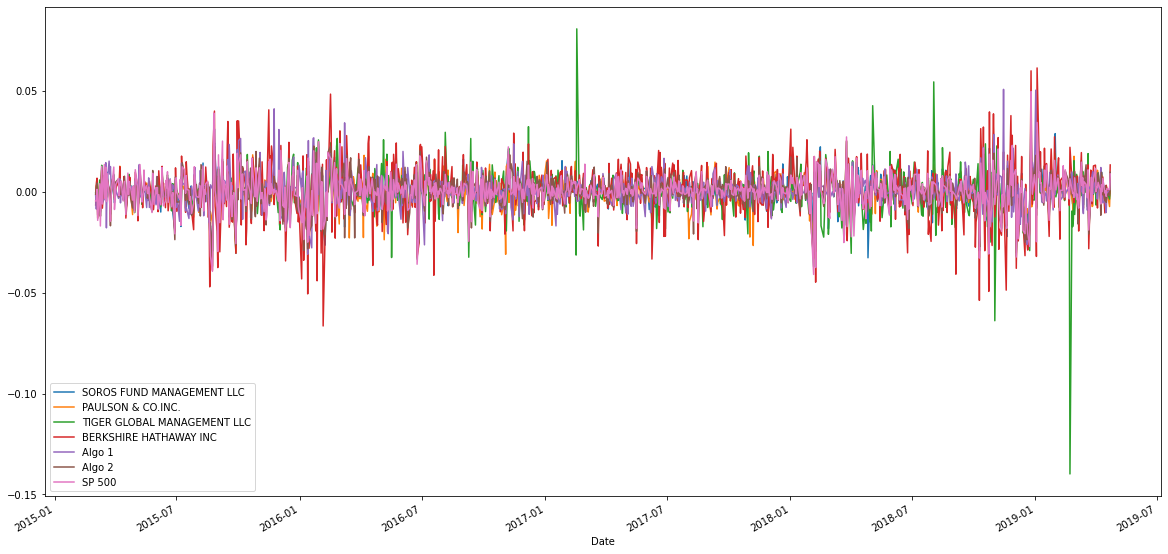

In [12]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

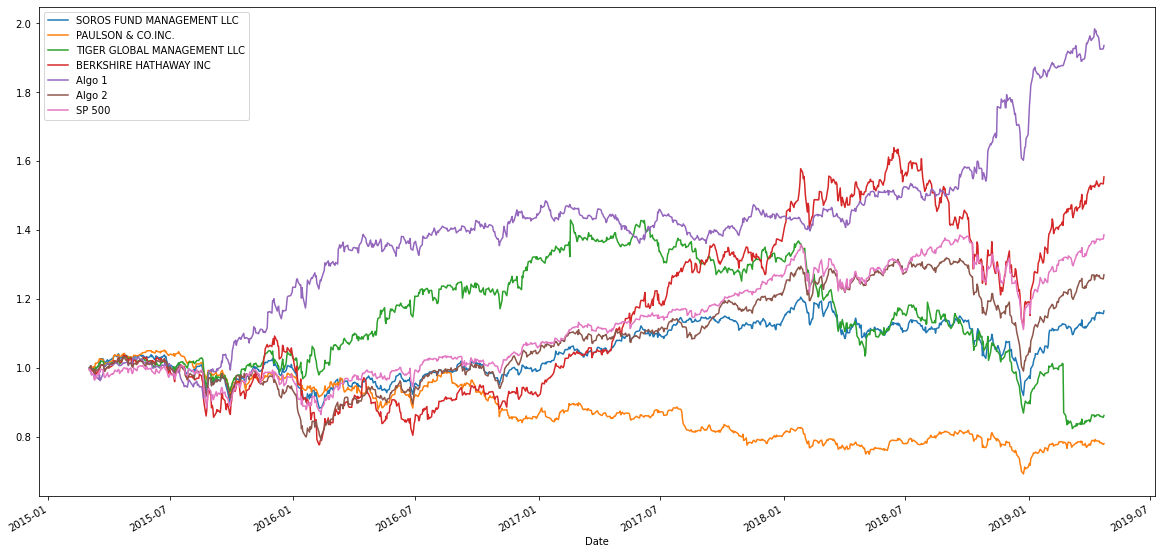

In [13]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

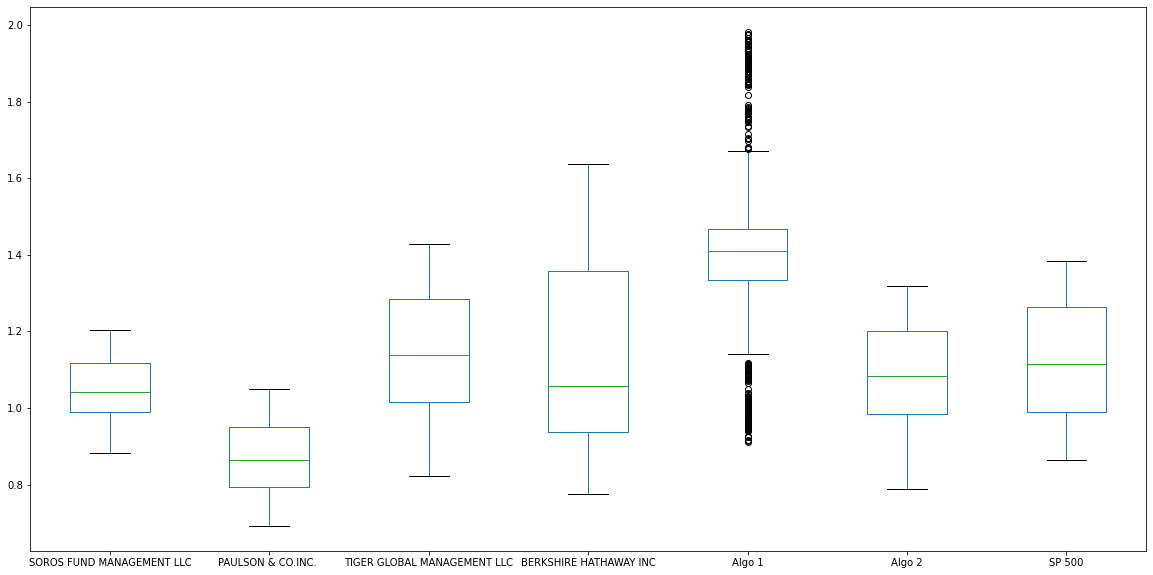

In [14]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [15]:
# Calculate the standard deviations of all portfolios
combined_df_std=combined_df.std()
combined_df_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP 500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [16]:
# Calculate  the daily standard deviation of S&P 500
combined_df_std['SP 500']
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = combined_df_std[(combined_df_std['SP 500']< combined_df_std)]
riskier_portfolios

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [17]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df_std * np.sqrt(252)
annualized_std.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP 500                         0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

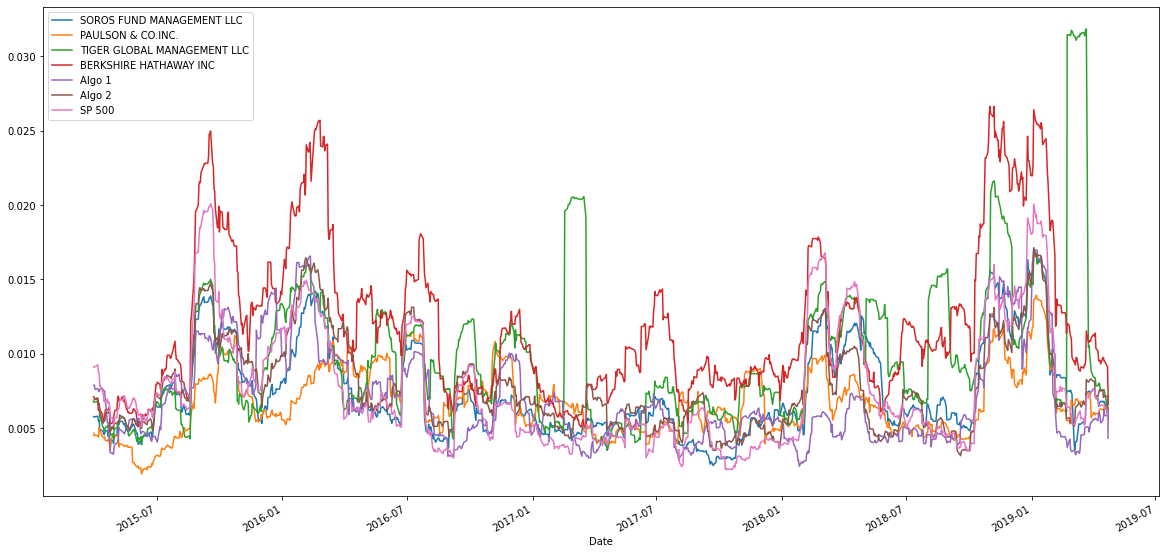

In [46]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot(figsize=(20,10))
# Plot the rolling standard deviation

### Calculate and plot the correlation

<AxesSubplot:>

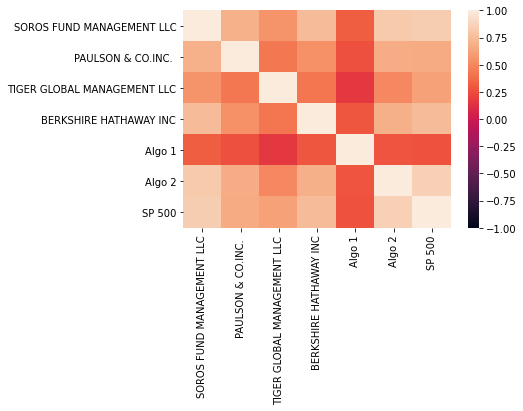

In [19]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation,vmin=-1,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [22]:
# Calculate covariance of a single portfolio
soros_covariance = combined_df["SOROS FUND MANAGEMENT LLC"].cov(combined_df['SP 500'])
# Calculate variance of S&P 500
variance = combined_df['SP 500'].var()
# Computing beta
soros_beta = soros_covariance/variance
print(f"Soros Beta {soros_beta}")
# Plot beta trend
# Rolling Soros Beta 

Soros Beta 0.7733753547794652


<AxesSubplot:xlabel='Date'>

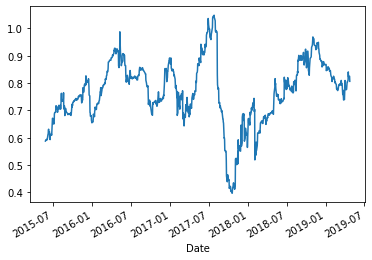

In [23]:
# Plot the beta trend 
rolling_soros_covariance= combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_df['SP 500'])
rolling_variance = combined_df['SP 500'].rolling(window=60).var()
rolling_soros_beta = rolling_soros_covariance / rolling_variance
rolling_soros_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [24]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std()* np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
SP 500                         0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

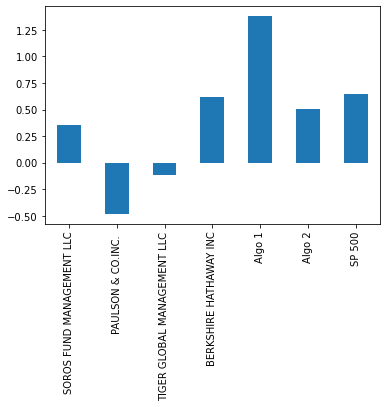

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

In [27]:
cumulative_returns1 = (1 + combined_df).cumprod()-1
cumulative_returns1.tail(1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2019-04-23,0.164568,-0.220354,-0.138811,0.553401,0.934691,0.269247,0.385517


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperforms the SP500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading combined stocks from a single DataFrame
my_stocks = Path("/Users/georgem/Desktop/Unit-4-Homework-Assignment--main/Resources/my_stocks.csv")
my_stocks= pd.read_csv(my_stocks,index_col="Date", infer_datetime_format=True, parse_dates=True)
my_stocks.head()

,MSFT,AAPL,AMZN,SP 500
Date,,,,
2012-03-05,31.80,19.04,180.26,136.75
2012-03-06,31.56,18.94,181.09,134.75
2012-03-07,31.84,18.95,183.77,135.69
2012-03-08,32.01,19.36,187.64,137.04
2012-03-09,31.99,19.47,184.32,137.57


In [29]:
# Calculate daily returns / Drop NAs/ Display sample data
my_stock_returns = my_stocks.pct_change().dropna()
my_stock_returns.head()

,MSFT,AAPL,AMZN,SP 500
Date,,,,
2012-03-06,-0.007547,-0.005252,0.004604,-0.014625
2012-03-07,0.008872,0.000528,0.014799,0.006976
2012-03-08,0.005339,0.021636,0.021059,0.009949
2012-03-09,-0.000625,0.005682,-0.017693,0.003867
2012-03-12,0.001563,0.012327,-0.005046,0.000073


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

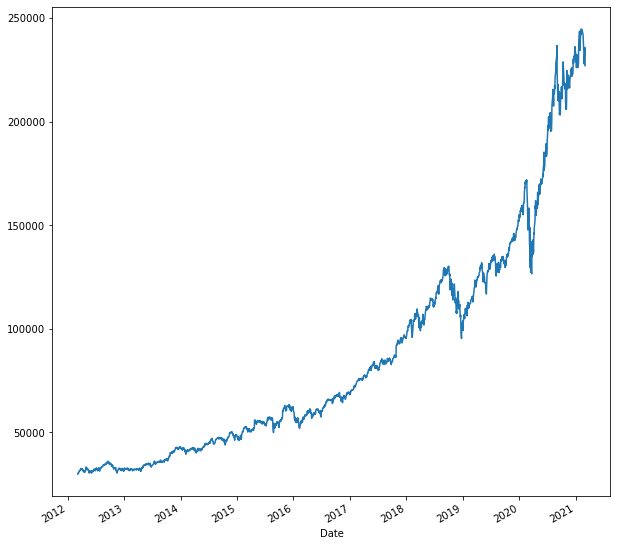

In [30]:
# Set weights
initial_investment = 30000
weights = [0.25,0.25,0.25,0.25]
my_portfolio_returns = my_stock_returns.dot(weights)
my_portfolio_cumulative_returns = (1 + my_portfolio_returns).cumprod()
my_portfolio_cumulative_profits = (initial_investment * my_portfolio_cumulative_returns)
my_portfolio_cumulative_profits.plot(figsize = (10,10))


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [31]:
# Join your returns DataFrame to the original returns DataFrame 
big_leagues = pd.concat([combined_df,my_portfolio_returns],axis = 'columns', join = 'inner')
big_leagues.rename(columns={ 0 : "My Portfolio"}, inplace = True)
big_leagues.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500,My Portfolio
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.002048
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.006566
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004293
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.005231
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.014089


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized `std`
big_leagues_std=big_leagues.std()
annualized_big_port = big_leagues_std * np.sqrt(252)
annualized_big_port.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP 500                         0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
My Portfolio                   0.194575
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

In [35]:
# Calculate Standard Deviation
big_leagues_std=big_leagues.std()
big_leagues_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP 500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
My Portfolio                   0.012257
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [36]:
# Below are the portfolios riskier than the SP 500
riskier_portfolios2 = big_leagues_std[(big_leagues_std['SP 500']< big_leagues_std)]
riskier_portfolios2

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
My Portfolio                   0.012257
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

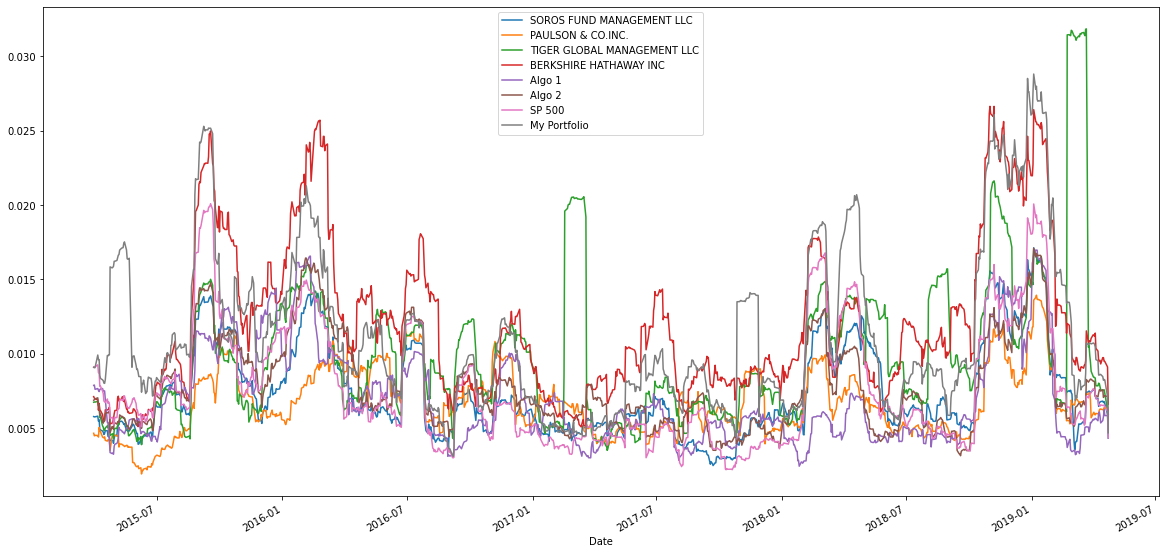

In [47]:
# Calculate rolling standard deviation / Plot rolling standard deviation
# Calculate and Plot Rolling std
big_leagues.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

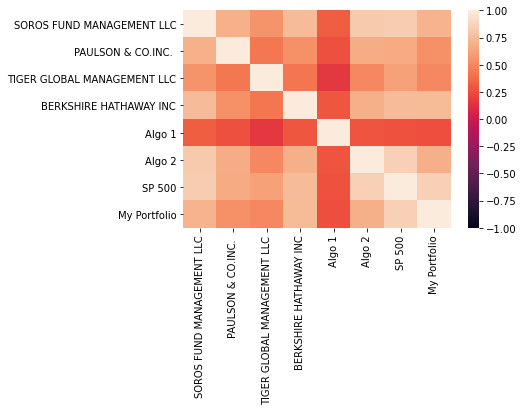

In [38]:
# Calculate and plot the correlation
correlation2 = big_leagues.corr()
sns.heatmap(correlation2,vmin=-1,vmax=1)

<AxesSubplot:xlabel='My Portfolio', ylabel='SP 500'>

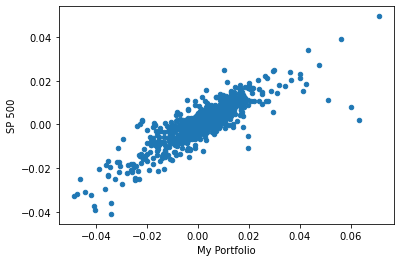

In [39]:
# My portfolio and SP 500 scatter plot
big_leagues.plot(kind = "scatter",x="My Portfolio", y= "SP 500")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [40]:
# Calculate and plot Beta
my_covariance = big_leagues["My Portfolio"].cov(combined_df['SP 500'])
variance = combined_df['SP 500'].var()

<AxesSubplot:xlabel='Date'>

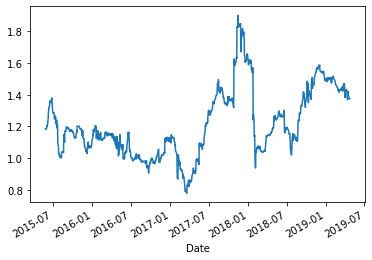

In [41]:
# My Rolling Beta
my_rolling_covariance= big_leagues["My Portfolio"].rolling(window=60).cov(big_leagues['SP 500'])
rolling_variance = big_leagues['SP 500'].rolling(window=60).var()
my_rolling_beta = my_rolling_covariance / rolling_variance
my_rolling_beta.plot()

In [42]:
# My Beta 
my_beta = my_covariance/variance
print(f"My Portfolio Beta {my_beta}")

My Portfolio Beta 1.2245473617611333


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_new = (big_leagues.mean() * 252) / (big_leagues.std()* np.sqrt(252))
sharpe_ratios_new.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
SP 500                         0.648267
My Portfolio                   1.216609
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

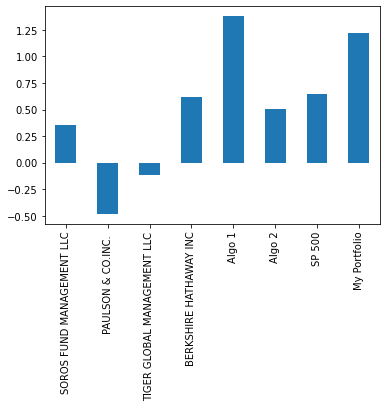

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot.bar()

### How does your portfolio do?

Write your answer here!

In [45]:
cumulative_returns = (1 + big_leagues).cumprod() -1
cumulative_returns.tail(1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500,My Portfolio
Date,,,,,,,,
2019-04-23,0.164568,-0.220354,-0.138811,0.553401,0.934691,0.269247,0.385517,1.46261


### My portfolio which had consisted of Microsoft, Amazon, Apple, and SPY SP500 ETF (equally weighted) had outperformed the rest of the portfolios 